In [9]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import normalize
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

np.random.seed(42)
usernames = [f'user_{i}' for i in range(100)]
subreddits = ['nba', 'nfl', 'soccer', 'baseball']

In [11]:
data = {
    'username': np.repeat(usernames, len(subreddits)),
    'subreddit': subreddits * len(usernames),
    'comment_count': np.random.poisson(lam=5, size=len(usernames) * len(subreddits))
}
df_raw = pd.DataFrame(data)
user_subreddit_matrix = df_raw.pivot_table(index='username', columns='subreddit', values='comment_count', fill_value=0)
user_matrix_norm = normalize(user_subreddit_matrix, norm='l1', axis=1)
user_matrix_norm_df = pd.DataFrame(user_matrix_norm, index=user_subreddit_matrix.index, columns=user_subreddit_matrix.columns)

In [13]:
wcss = []
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(user_matrix_norm)
    wcss.append(kmeans.inertia_)

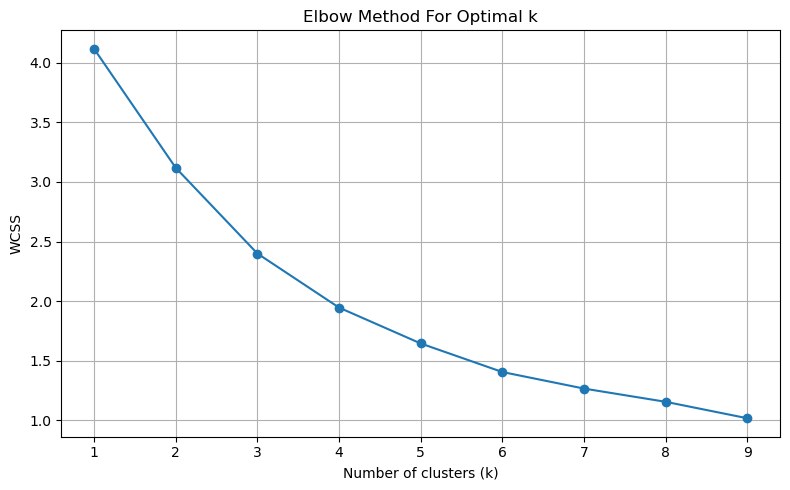

In [15]:
plt.figure(figsize=(8, 5))
plt.plot(range(1, 10), wcss, marker='o')
plt.title('Elbow Method For Optimal k')
plt.xlabel('Number of clusters (k)')
plt.ylabel('WCSS')
plt.grid(True)
plt.tight_layout()
plt.show()

In [17]:
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
clusters = kmeans.fit_predict(user_matrix_norm)
user_matrix_norm_df['cluster'] = clusters

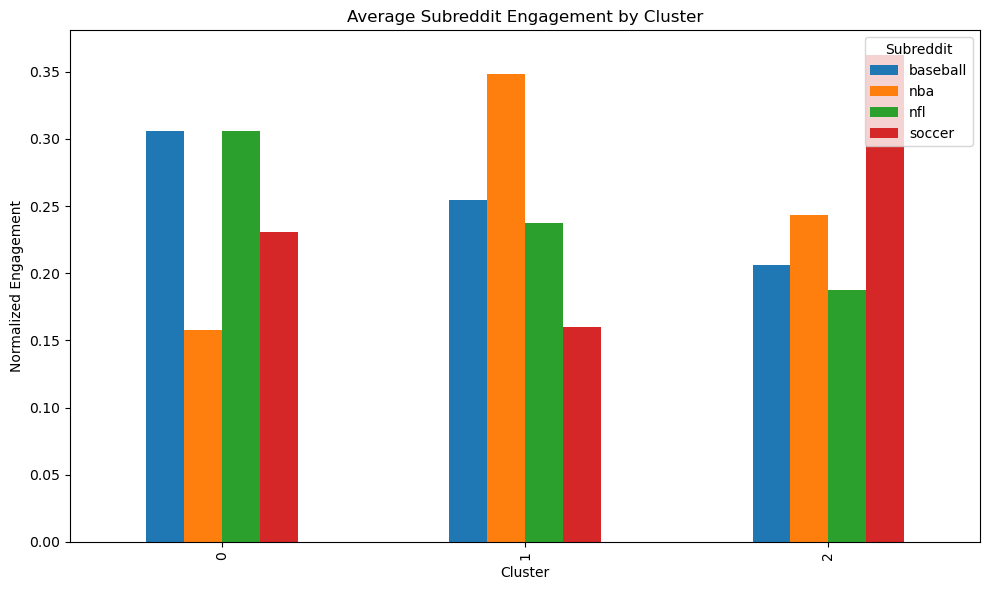

In [19]:
cluster_centers = pd.DataFrame(kmeans.cluster_centers_, columns=user_subreddit_matrix.columns)
cluster_centers.index.name = 'Cluster'

cluster_centers.plot(kind='bar', figsize=(10, 6))
plt.title('Average Subreddit Engagement by Cluster')
plt.ylabel('Normalized Engagement')
plt.xlabel('Cluster')
plt.legend(title='Subreddit')
plt.tight_layout()
plt.show()